<br/><div id="top"></div>
<center><a style="font-size: 40pt; font-weight:bold"> Signal Processing TP2</a></center>
<br/>

---

# Group members
* Jauroyon, Maxime
* Bhatt, Ragi

---

# Exercise 1 - Delay Effect

## Data

Any sound files (you can use the sounds used for the guitar tuner)

## Goal

The FIR filter for delay effect can be implement thanks to the following input-output equation (e[t] is the input, s[t] is the output): s[t]=e[t]+αe[t−D] α≥0 is the attenuation factor, and D the time delay.

    Determine the impulse response of the filter
    Provide the Frequency response of the filter
    Implement the delay effect in the time domain

The IIR filter for delay effect can be implement thanks to the following input-output equation (e[t] is the input, s[t] is the output): s[t]=αe[t]+β α≥0 is the scaling factor, β≥0 the attenuation factor and D≥0 the time delay.

    Determine the impulse response of the filter for D=1
    Provide the Frequency response of the filter
    Implement the delay effect in the time domain
    Is this implementation always stable ?
    Discuss the parameters
    Compare with the FIR implementation

## Import the libraries

In [1]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.io.wavfile as wavfile
from scipy.fft import fft, fftfreq
from IPython.display import Audio

## Working on the first sound file of the guitar tuner.

Sampling frequency =  44100 Hz
Number of samples =  237568


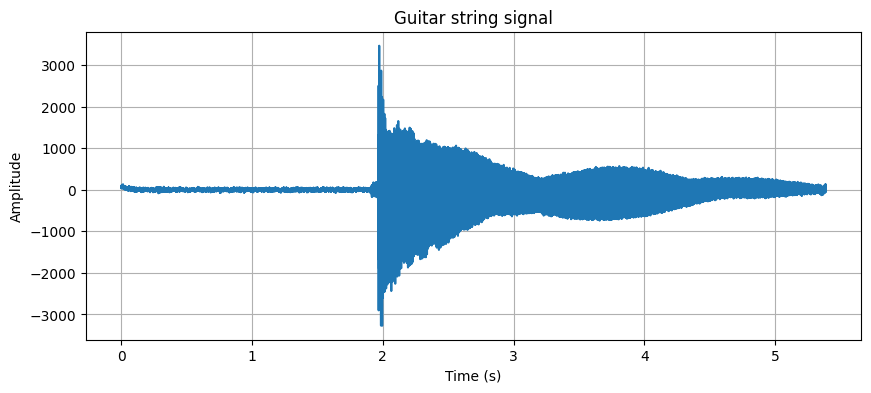

In [2]:
# read the wav file
fs, data = wavfile.read('string_1.wav')

# Print the sampling frequency and the number of samples
print('Sampling frequency = ', fs, 'Hz')
print('Number of samples = ', data.shape[0])

# Create a time vector
t = np.arange(data.shape[0]) / fs

# Plot the signal
plt.figure(figsize=(10, 4))
plt.plot(t, data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Guitar string signal')
plt.grid()
plt.show()

In [3]:
Audio(data, rate=fs)

## FIR Delay effect : For loop

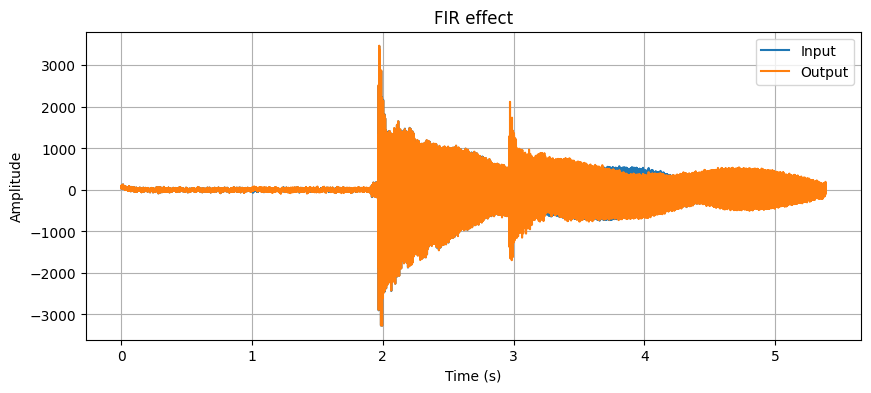

In [4]:
# doing the FIR effect 
# FIR equation : s[t]=e[t]+αe[t−D]
D = 1 # second
# compute the number of samples to delay
delay = int(D * fs)
alpha = 0.5

output_FIR = np.zeros(data.shape[0])
output_FIR[:delay] = data[:delay]
for i in range(delay, data.shape[0]):
    output_FIR[i] = data[i] + 0.5 * data[i-delay]

# plot in the time domain
plt.figure(figsize=(10, 4))
plt.plot(t, data, label='Input')
plt.plot(t, output_FIR, label='Output')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('FIR effect')
plt.grid()
plt.legend()
plt.show()


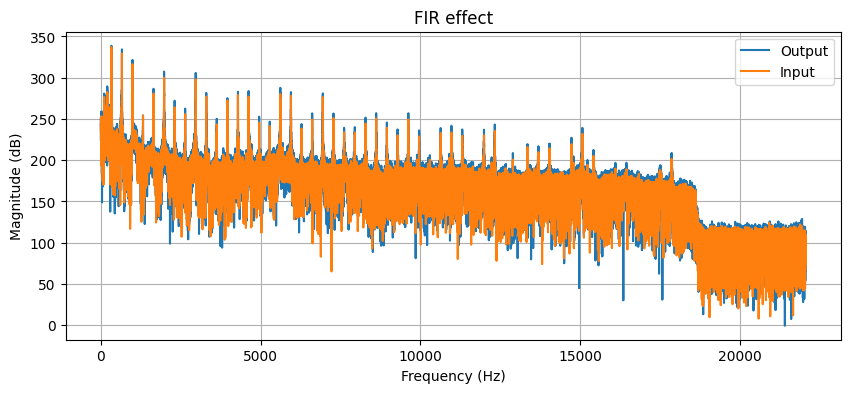

In [5]:
# plot in the frequency domain
# Compute the Fourier transform
output_FIR_fft = fft(output_FIR)

# Compute the frequencies vector
f = fftfreq(data.shape[0], 1/fs)

# compute the Fourier transform
data_fft = fft(data)

# Plot the results on the same plot and only positive frequencies
plt.figure(figsize=(10, 4))
plt.plot(f[f>=0], 20*np.log(np.abs(output_FIR_fft[f>=0])+np.finfo(float).eps), label='Output')
plt.plot(f[f>=0], 20*np.log(np.abs(data_fft[f>=0])+np.finfo(float).eps), label='Input')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('FIR effect')
plt.grid()
plt.legend()
plt.show()

In [6]:
Audio(output_FIR, rate=fs)

## FIR Delay effect : filter function

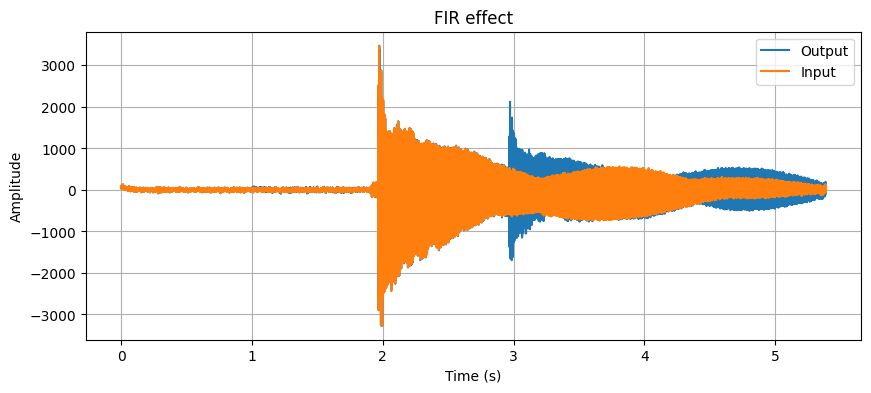

Difference between the two methods =  0.0


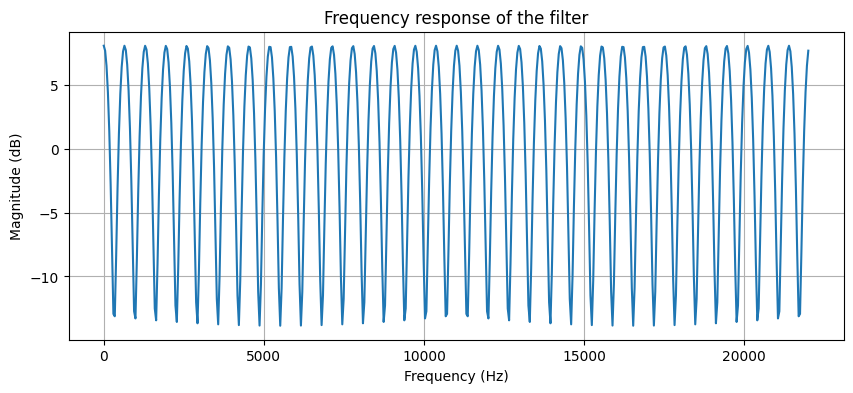

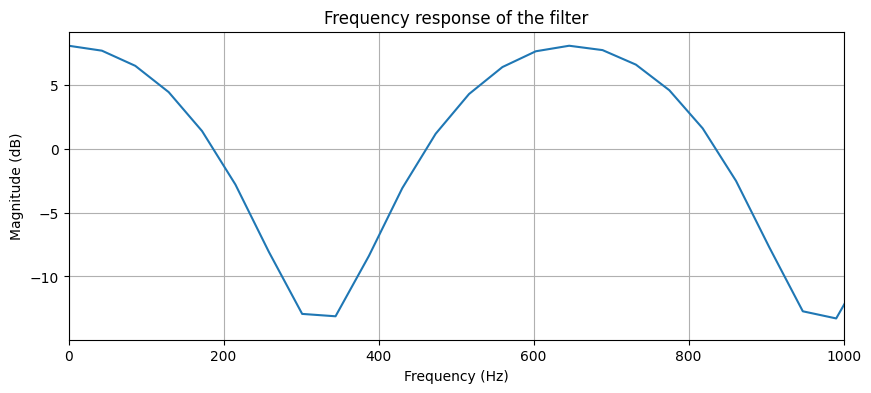

In [7]:
# doing it again but now with a filter
# compute the impulse response

# create the filter
b = np.zeros(delay+1)
b[0] = 1
b[delay] = alpha

# apply the filter
output_FIR_2 = signal.lfilter(b, 1, data)

# plot in the time domain
plt.figure(figsize=(10, 4))
plt.plot(t, output_FIR_2, label='Output')
plt.plot(t, data, label='Input')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('FIR effect')
plt.grid()
plt.legend()
plt.show()

# we check that the two methods are the same
print('Difference between the two methods = ', np.sum(np.abs(output_FIR_2 - output_FIR)))

# compute the frequency response of the filter
w, h = signal.freqz(b, 1, fs=fs)

# plot the frequency response
plt.figure(figsize=(10, 4))
plt.plot(w, 20 * np.log(np.abs(h)+np.finfo(float).eps) )
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Frequency response of the filter')
plt.grid()
plt.show()

# zoom in the frequency response
plt.figure(figsize=(10, 4))
plt.plot(w, 20 * np.log(np.abs(h)+np.finfo(float).eps) )
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Frequency response of the filter')
plt.grid()
plt.xlim([0, 1000])
plt.show()
 
# give the audio output
Audio(output_FIR_2, rate=fs)



## IIR Delay effect : For loop

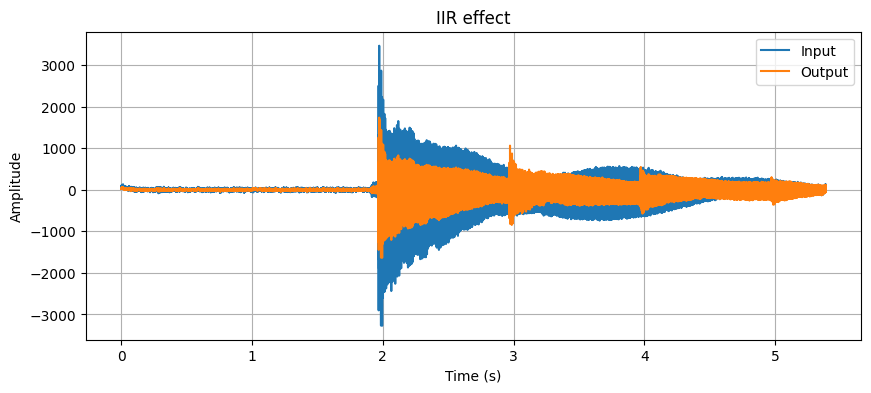

In [8]:
# now doing the IIR effect 
# IIR equation : s[t]=αe[t]+βs[t−D]
beta = 0.5

output_IIR = np.zeros(data.shape[0])
output_IIR[:delay] = alpha * data[:delay]
for i in range(delay, data.shape[0]):
    output_IIR[i] = alpha * data[i] + beta * output_IIR[i-delay]

# plot in the time domain
plt.figure(figsize=(10, 4))
plt.plot(t, data, label='Input')
plt.plot(t, output_IIR, label='Output')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('IIR effect')
plt.grid()
plt.legend()
plt.show()

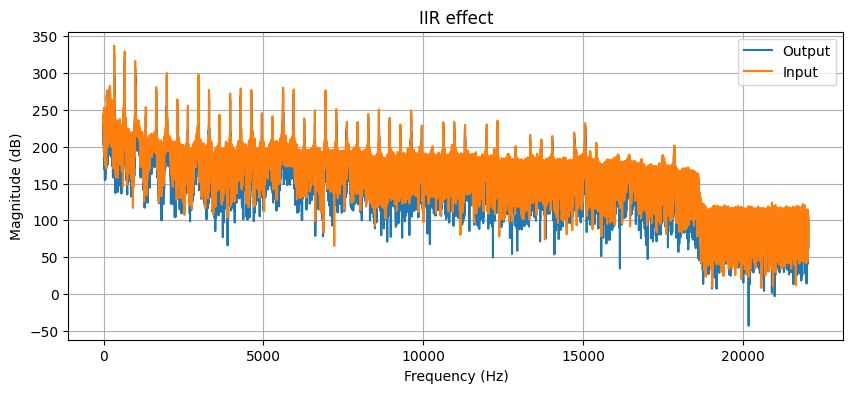

In [9]:
# plot in the frequency domain
# Compute the fourier transform
output_IIR_fft = fft(output_IIR)

# Plot the frequency response
plt.figure(figsize=(10, 4))
plt.plot(f[f>=0], 20*np.log(np.abs(output_IIR_fft[f>=0])+np.finfo(float).eps), label='Output')
plt.plot(f[f>=0], 20*np.log(np.abs(data_fft[f>=0])+np.finfo(float).eps), label='Input')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('IIR effect')
plt.grid()
plt.legend()
plt.show()

In [10]:
Audio(output_IIR, rate=fs)

## IIR Delay effect : filter function

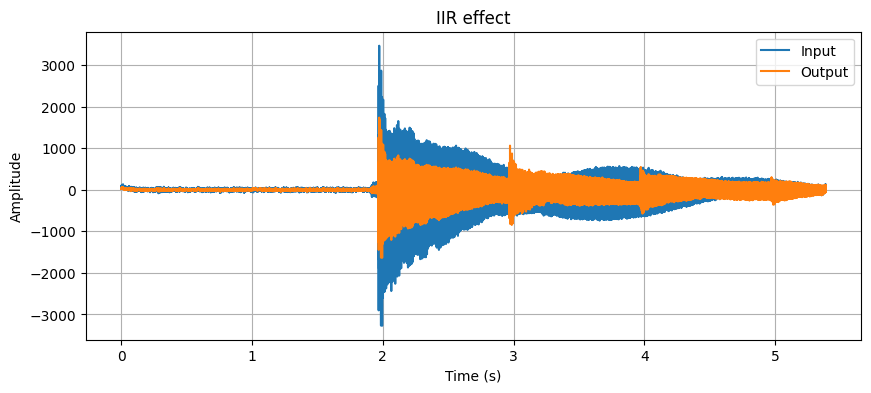

Difference between the two methods =  0.0


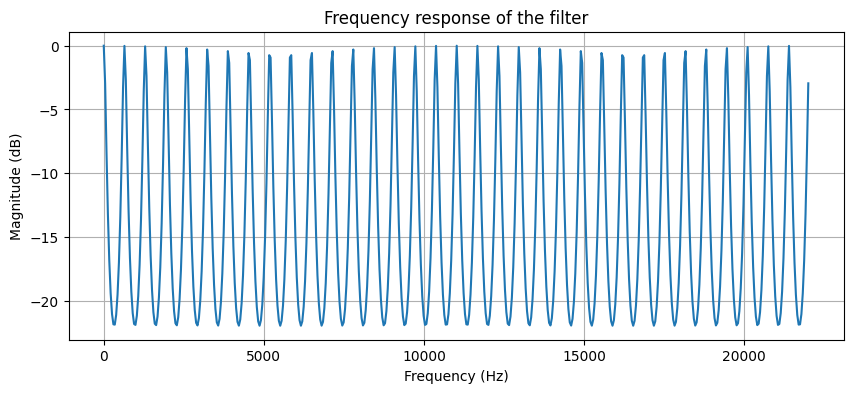

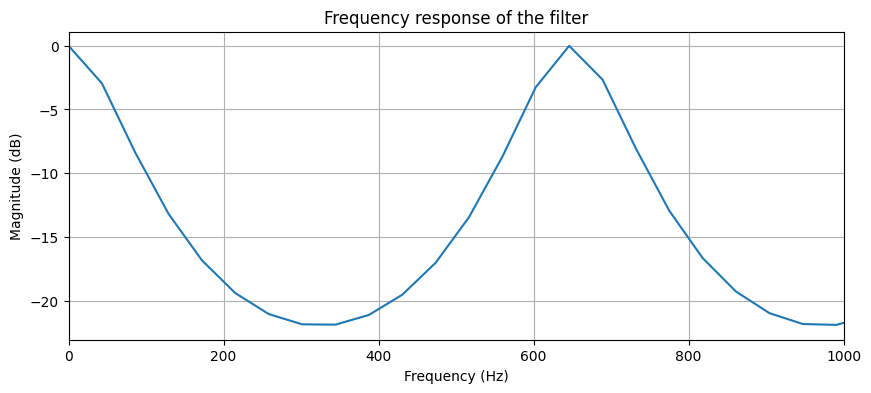

In [11]:
# doing it again but now with a filter
# compute the impulse response

# create the filter for the input part
b = np.array([alpha])

# create the filter for the output part
a = np.zeros(delay+1)
a[0] = 1
a[delay] = -beta

# apply the filter
output_IIR_2 = signal.lfilter(b, a, data)

# plot in the time domain
plt.figure(figsize=(10, 4))
plt.plot(t, data, label='Input')
plt.plot(t, output_IIR_2, label='Output')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('IIR effect')
plt.grid()
plt.legend()
plt.show()

# we check that the two methods are the same
print('Difference between the two methods = ', np.sum(np.abs(output_IIR_2 - output_IIR)))

# compute the frequency response of the filter
w, h = signal.freqz(b, a, fs=fs)

# plot the frequency response
plt.figure(figsize=(10, 4))
plt.plot(w, 20 * np.log(np.abs(h)+np.finfo(float).eps))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Frequency response of the filter')
plt.grid()
plt.show()

# zoom in the frequency response
plt.figure(figsize=(10, 4))
plt.plot(w, 20 * np.log(np.abs(h)+np.finfo(float).eps))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Frequency response of the filter')
plt.grid()
plt.xlim([0, 1000])
plt.show()


# give the audio output
Audio(output_IIR_2, rate=fs)

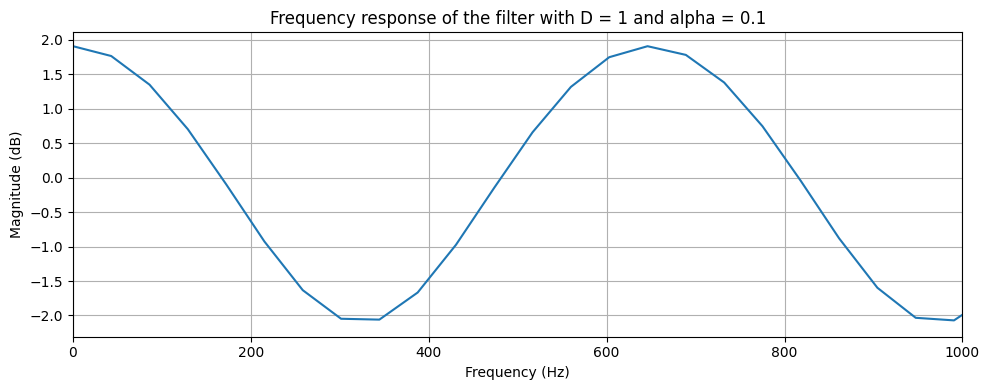

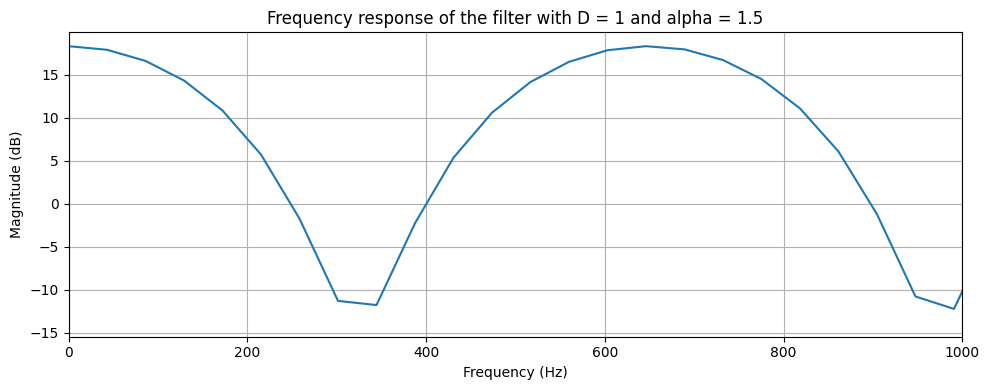

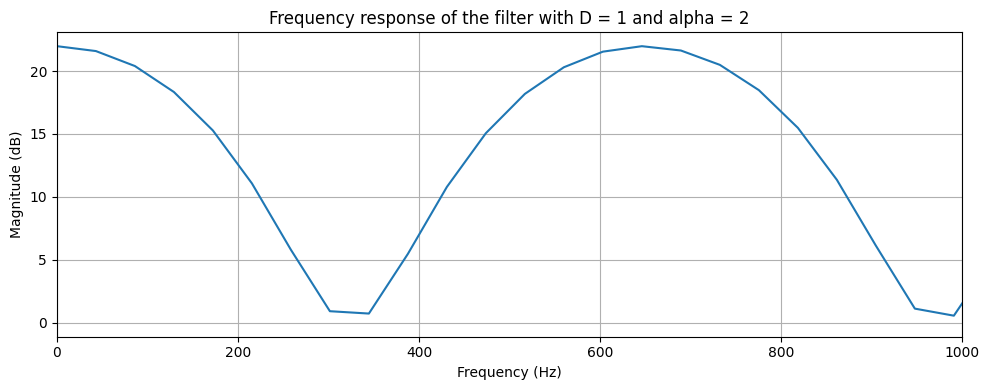

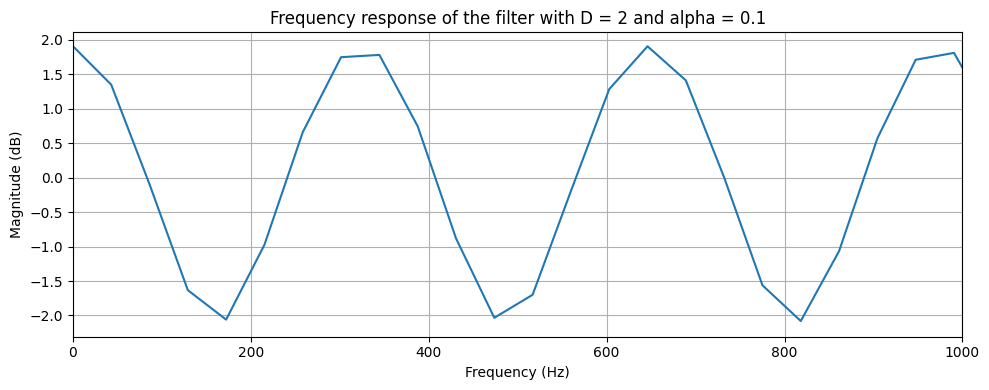

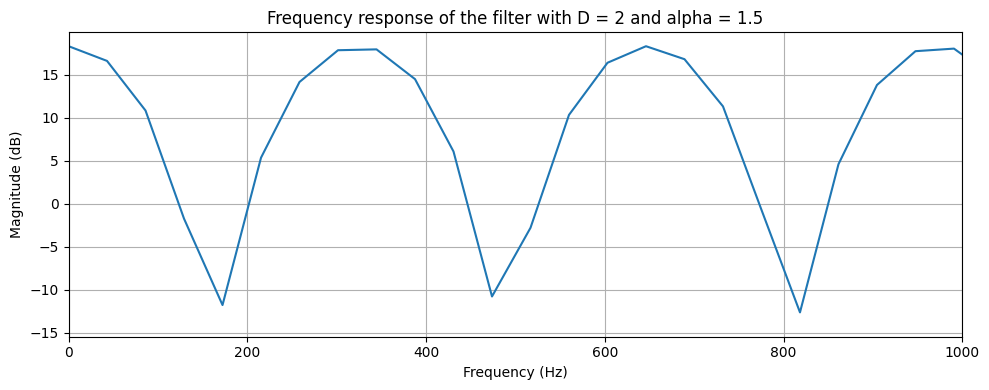

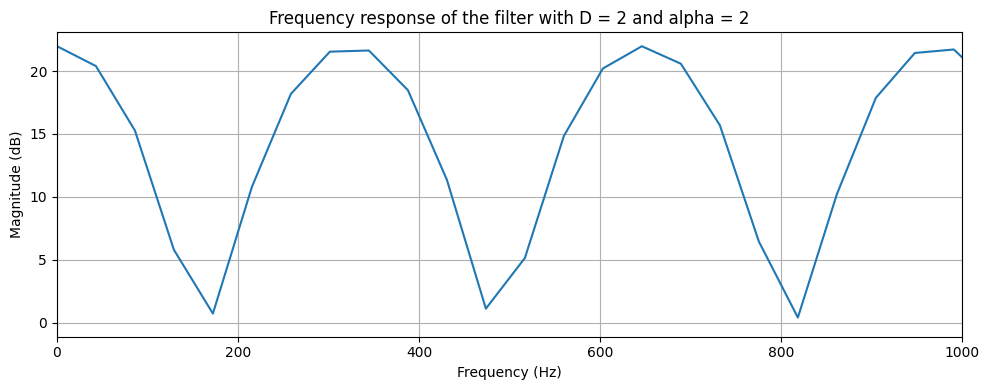

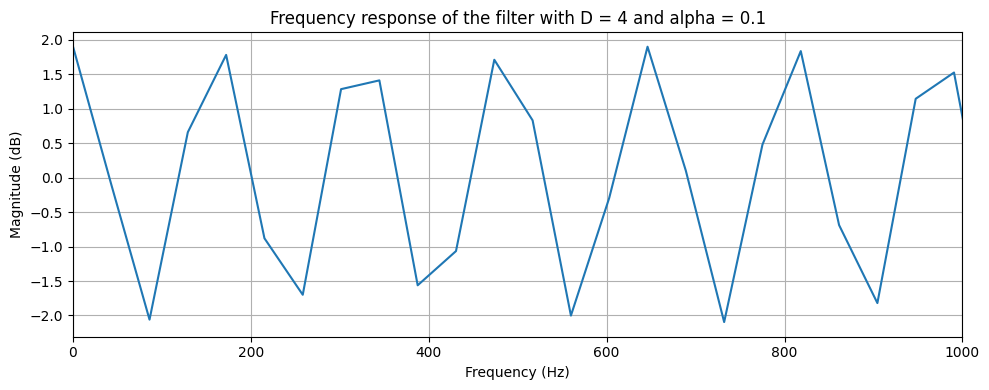

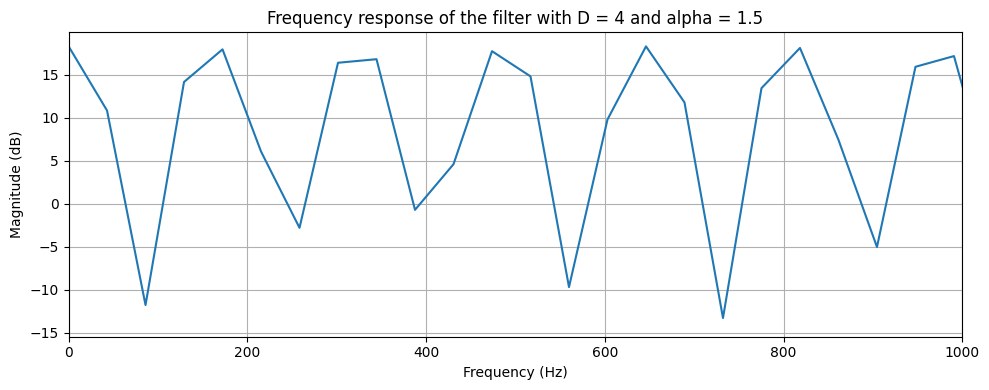

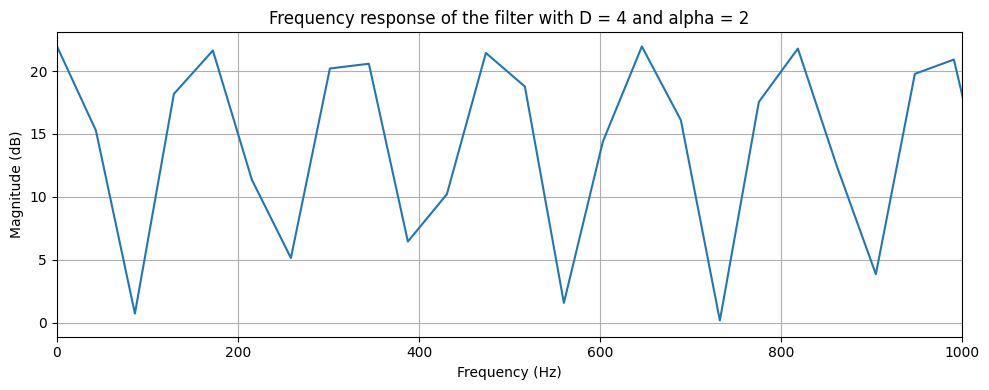

In [24]:
#Calculating the frequency response of the impulse response

for D in [1,2,4]:
    for alpha in [0.1, 1.5, 2]:
        delay = int(D * fs)
        b = np.zeros(delay+1)
        b[0] = 1
        b[delay] = alpha
        w, h = signal.freqz(b, 1, fs=fs)
        plt.figure(figsize=(10,4))
        plt.plot(w, 20 * np.log(np.abs(h)+np.finfo(float).eps))
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Magnitude (dB)')
        plt.title('Frequency response of the filter with D = '+str(D)+' and alpha = '+str(alpha))
        plt.grid()
        plt.xlim([0, 1000])
        plt.tight_layout()
        plt.show()


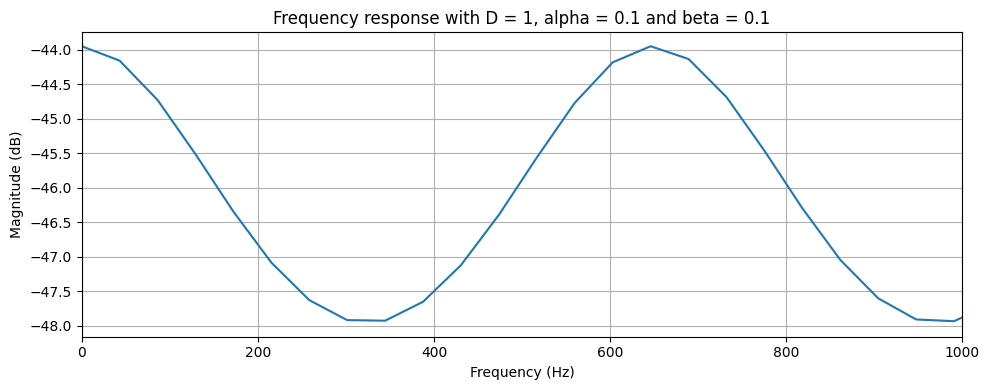

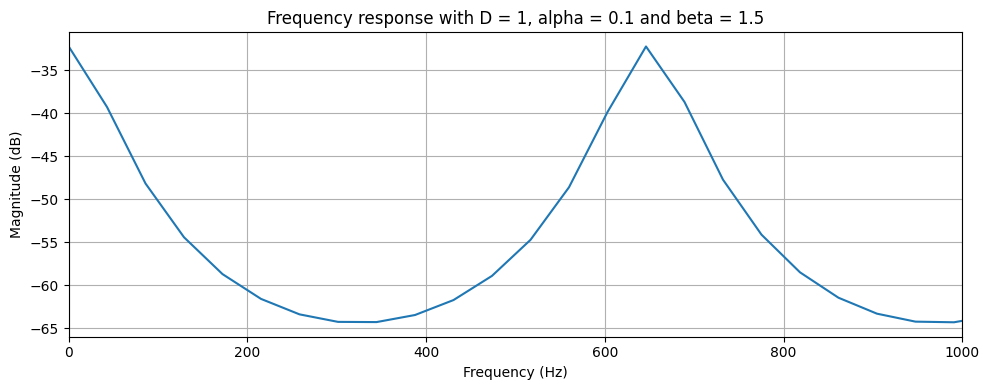

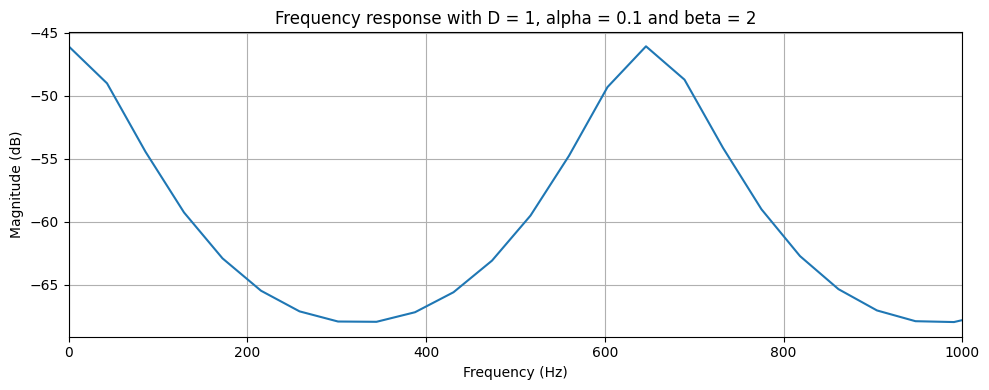

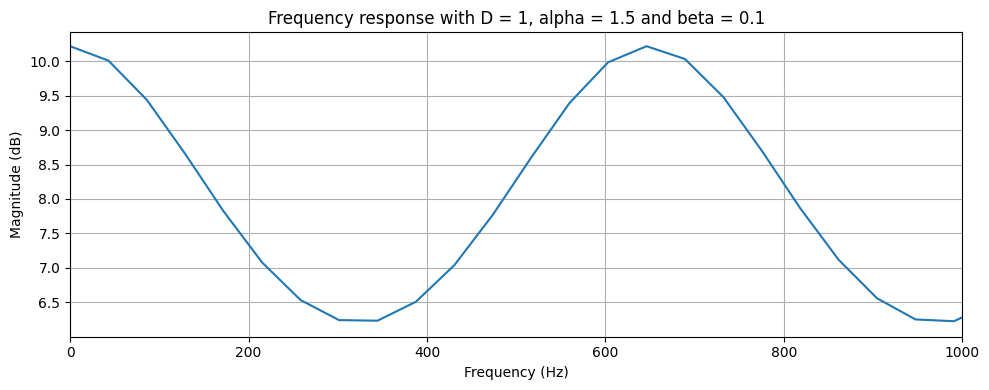

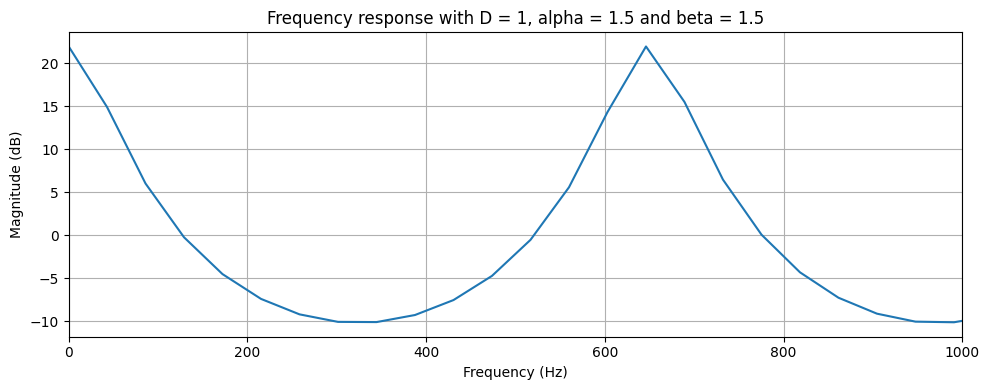

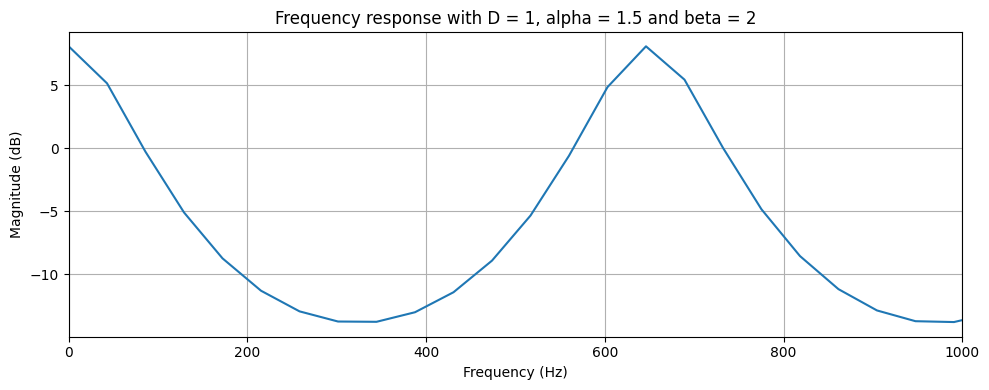

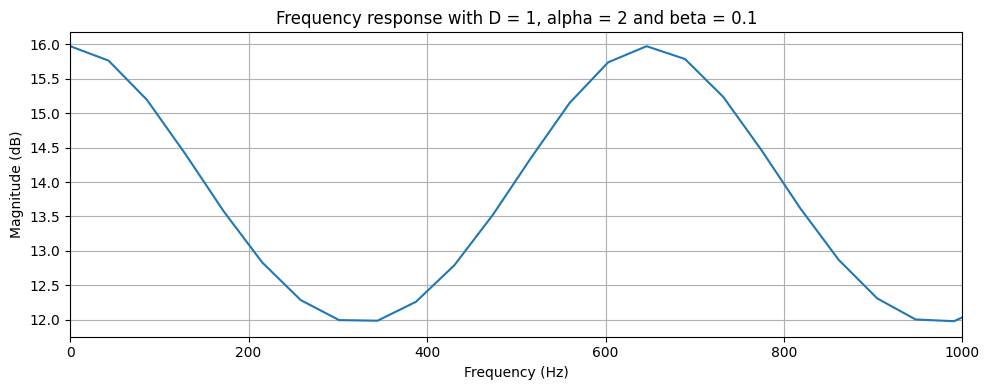

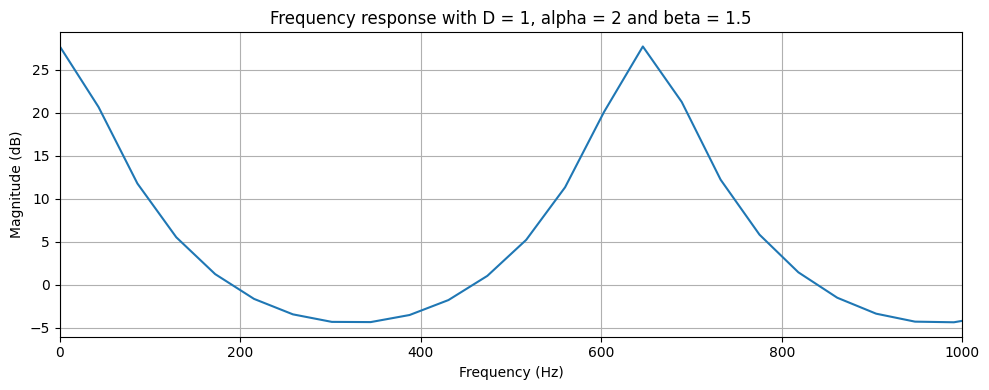

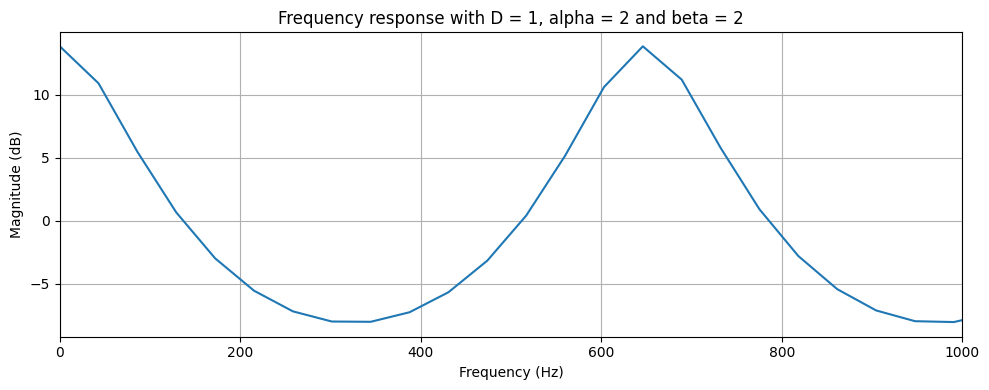

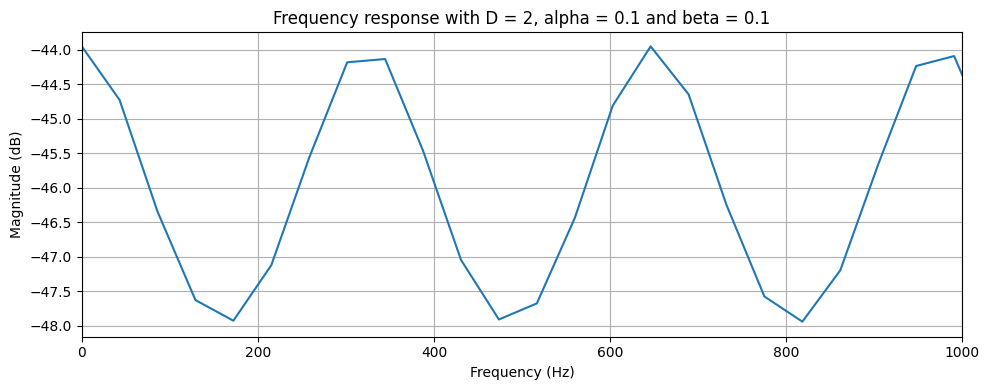

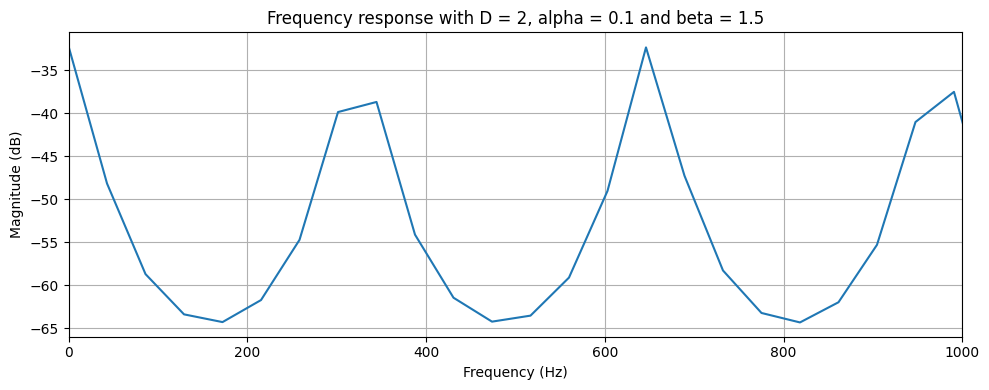

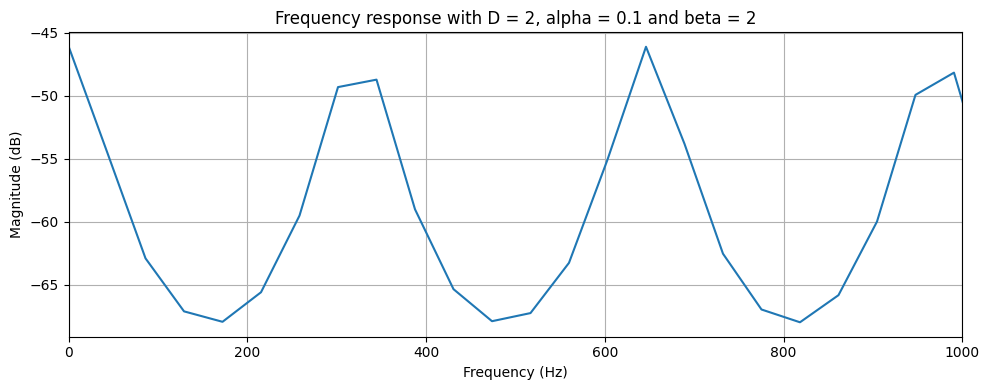

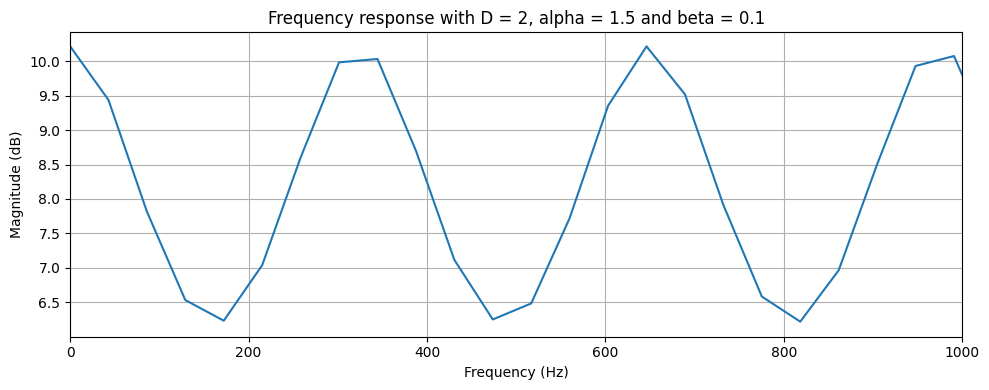

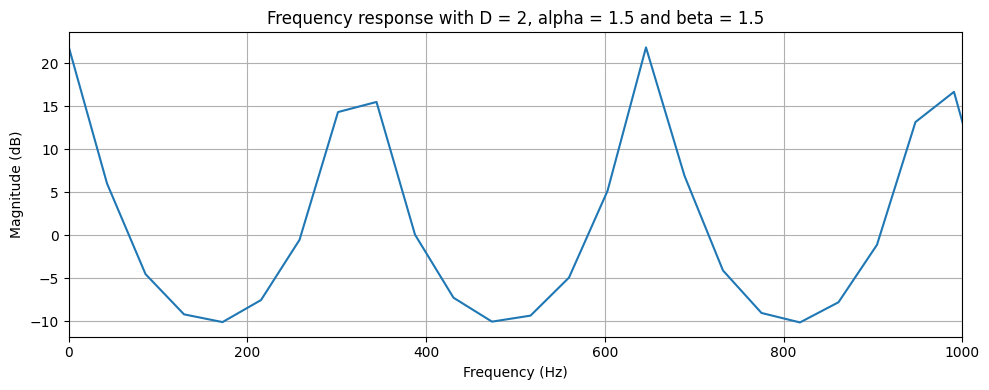

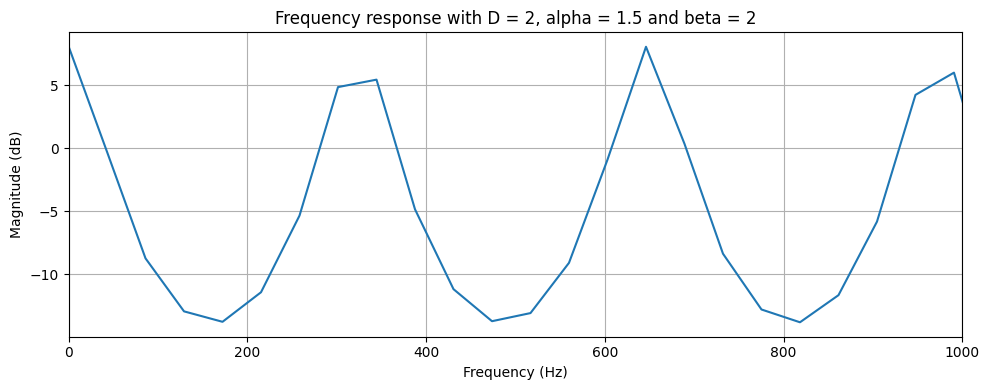

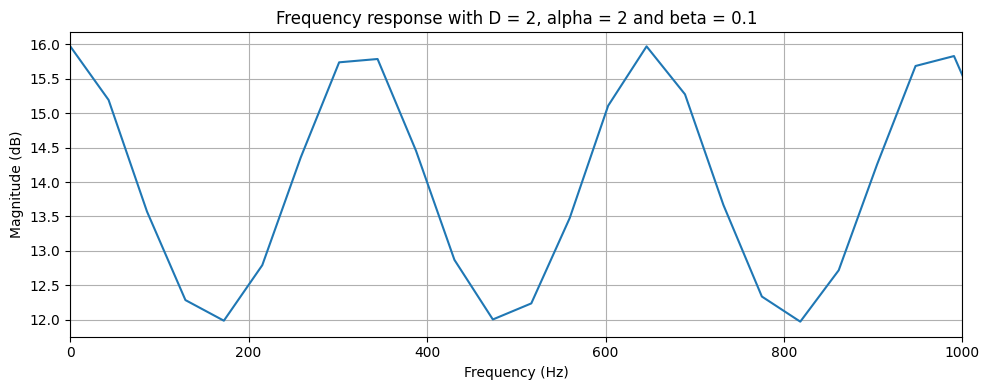

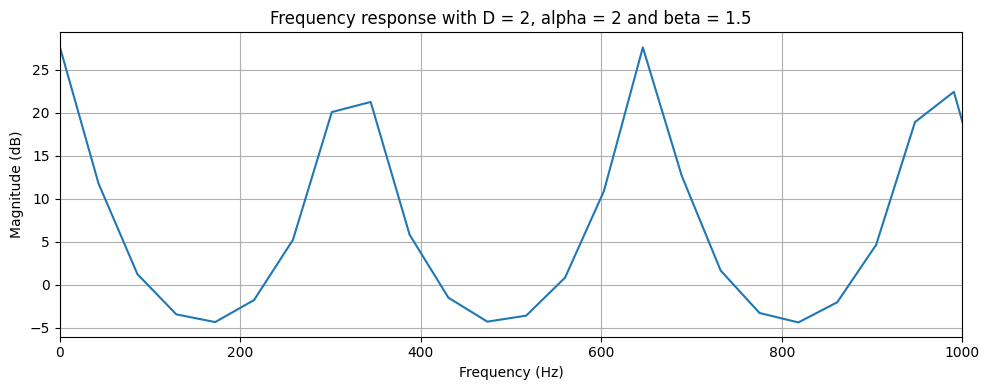

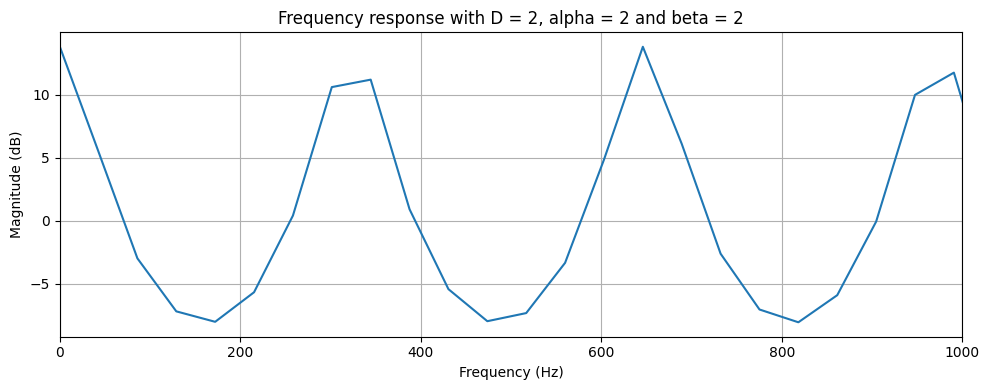

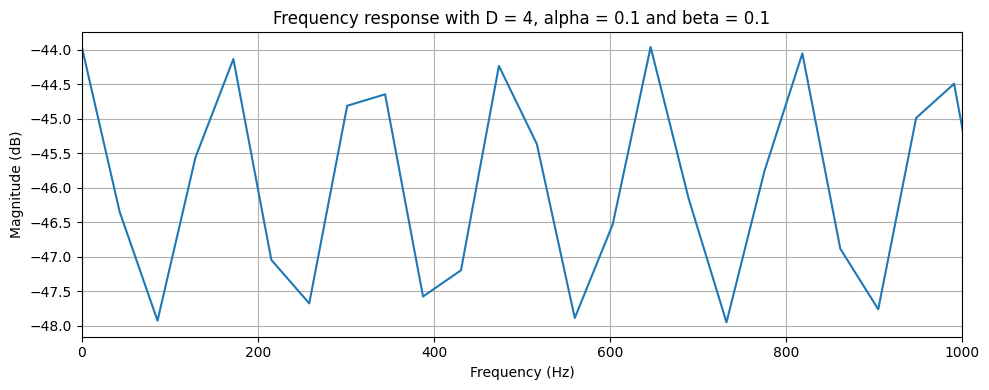

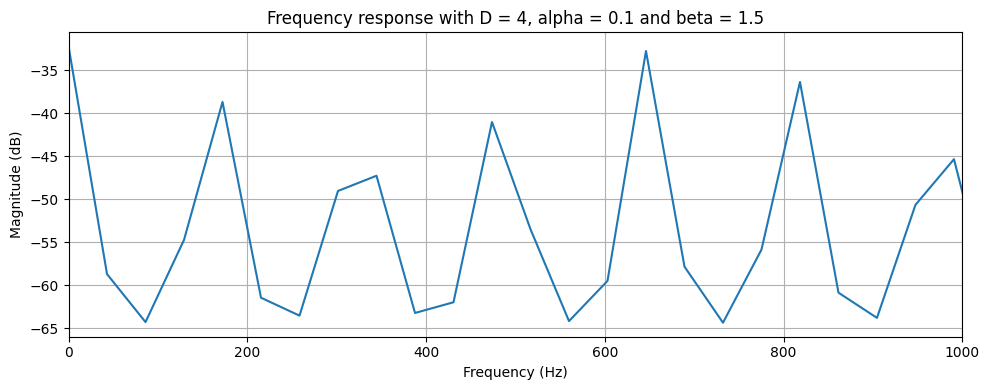

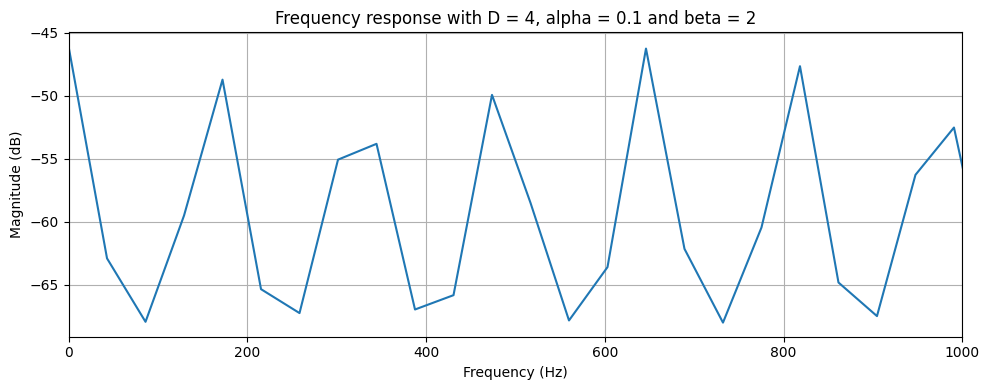

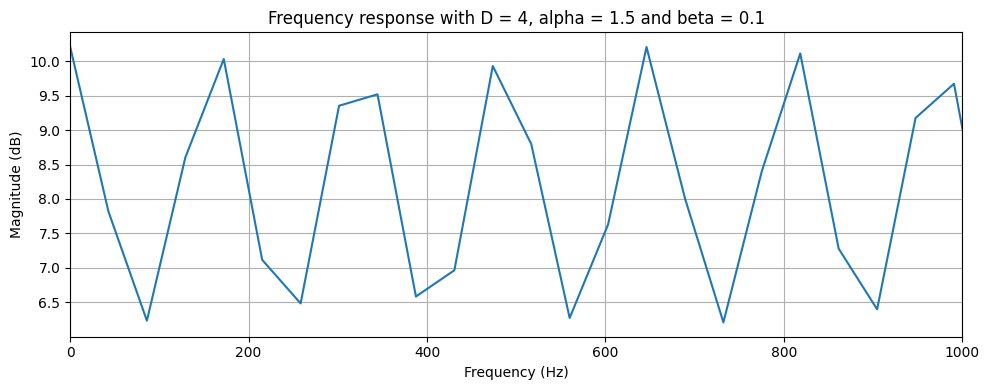

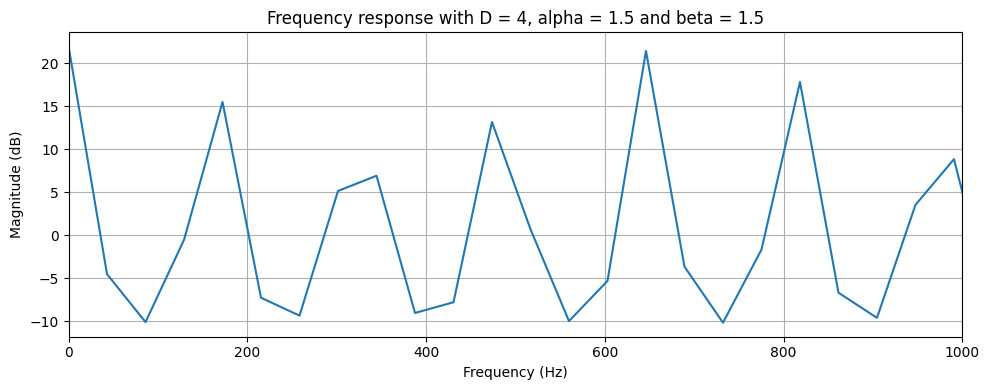

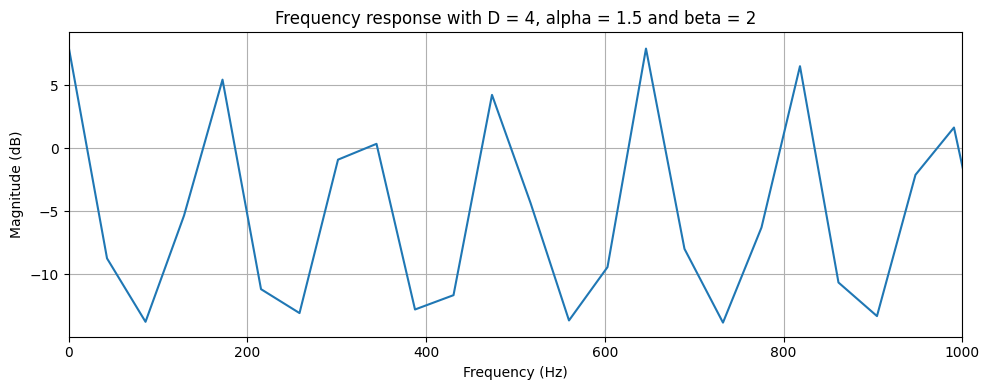

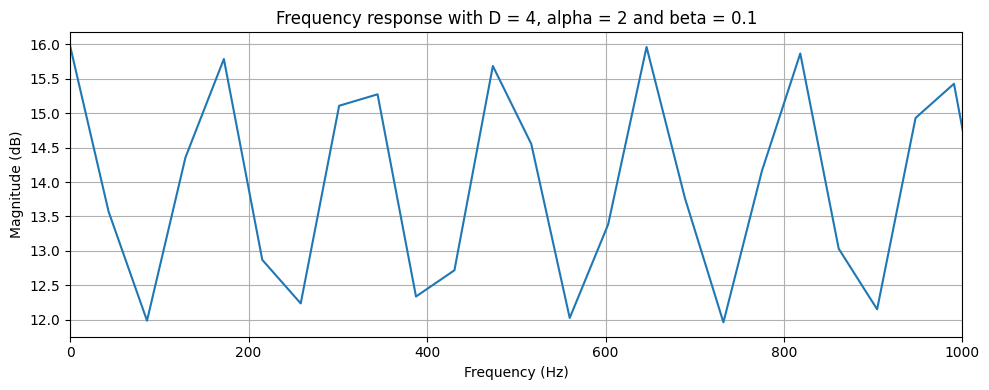

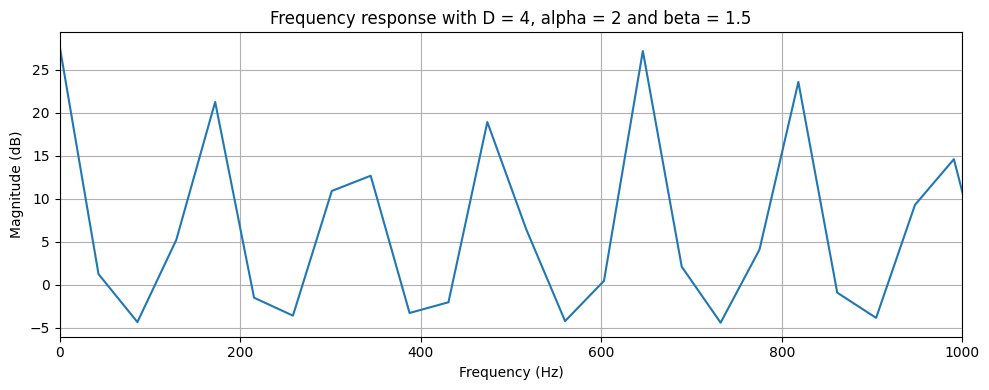

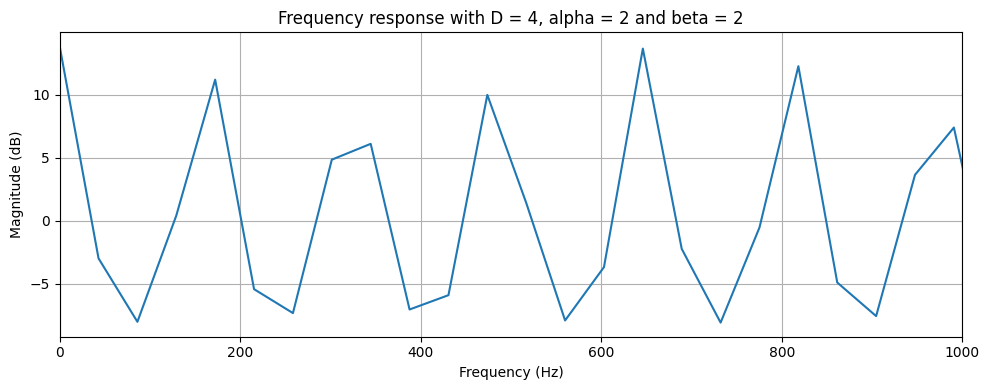

In [25]:
#Calculating the frequency response of the impulse response in the case of the IIR filter

for D in [1,2,4]:
    for alpha in [0.1, 1.5, 2]:
        for beta in [0.1, 1.5, 2]:
            delay = int(D * fs)
            b = np.array([alpha])
            a = np.zeros(delay+1)
            a[0] = 1
            a[delay] = -beta
            w, h = signal.freqz(b, a, fs=fs)
            plt.figure(figsize=(10,4))
            plt.plot(w, 20 * np.log(np.abs(h)+np.finfo(float).eps))
            plt.xlabel('Frequency (Hz)')
            plt.ylabel('Magnitude (dB)')
            plt.title('Frequency response with D = '+str(D)+', alpha = '+str(alpha)+' and beta = '+str(beta))
            plt.grid()
            plt.xlim([0, 1000])
            plt.tight_layout()
            plt.show()

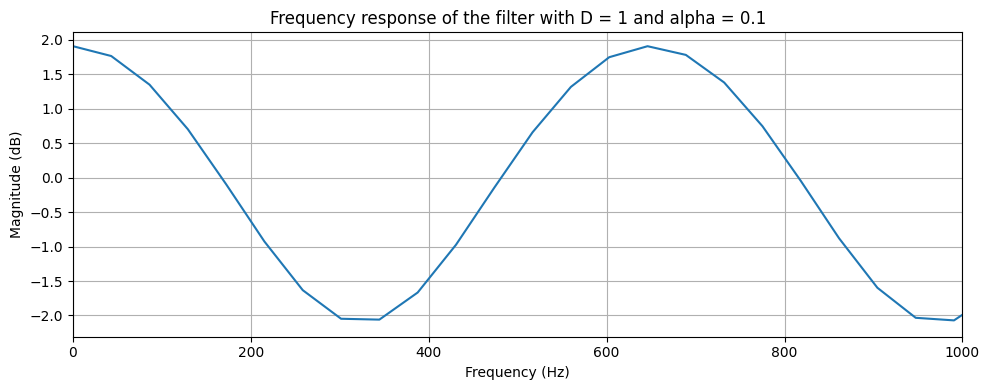

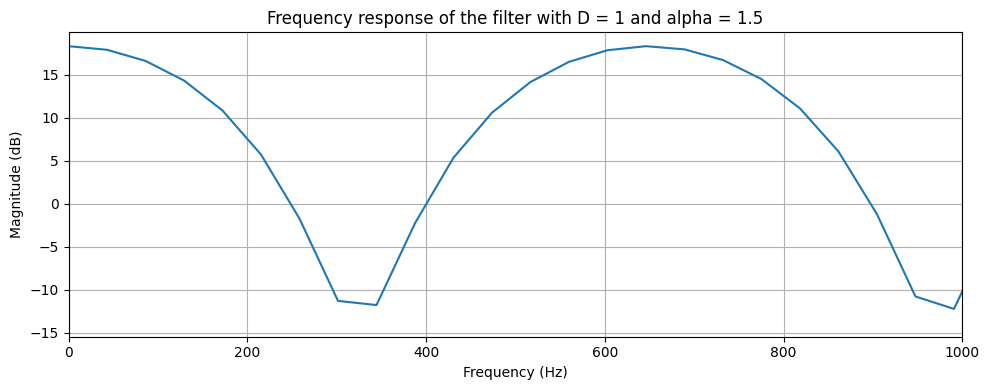

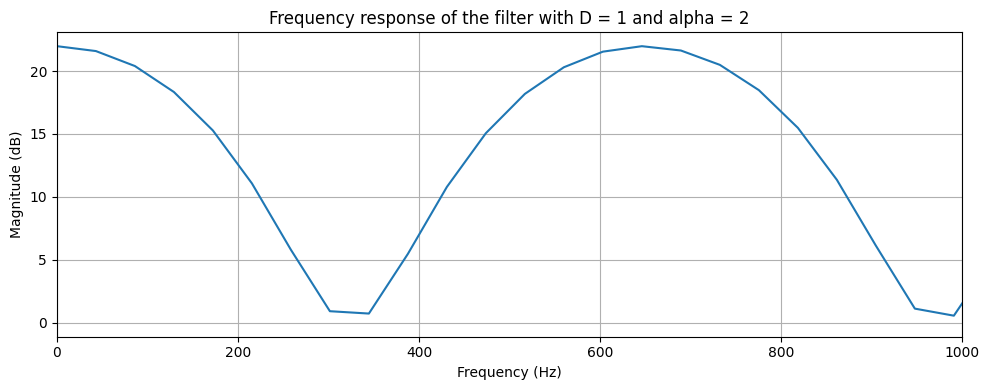

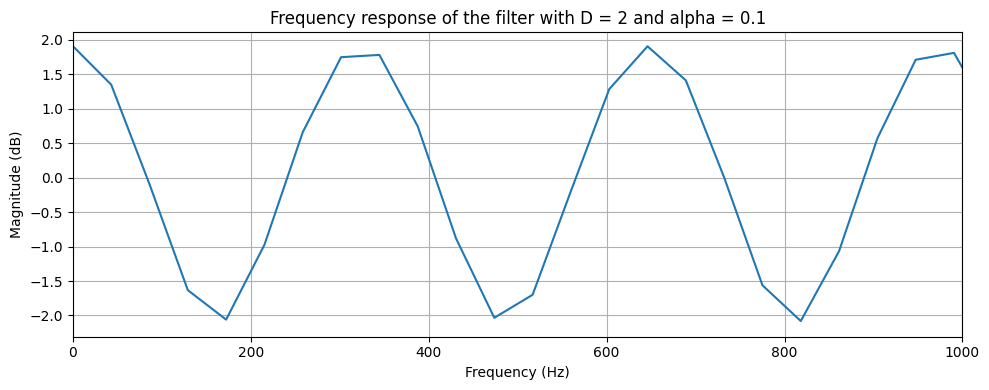

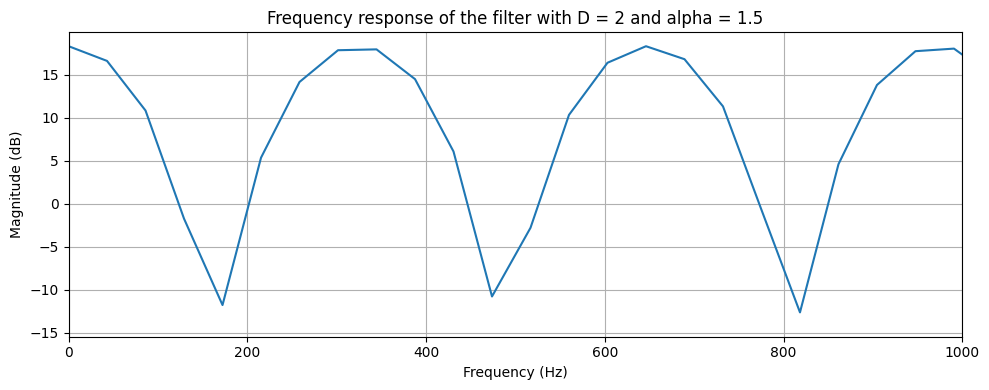

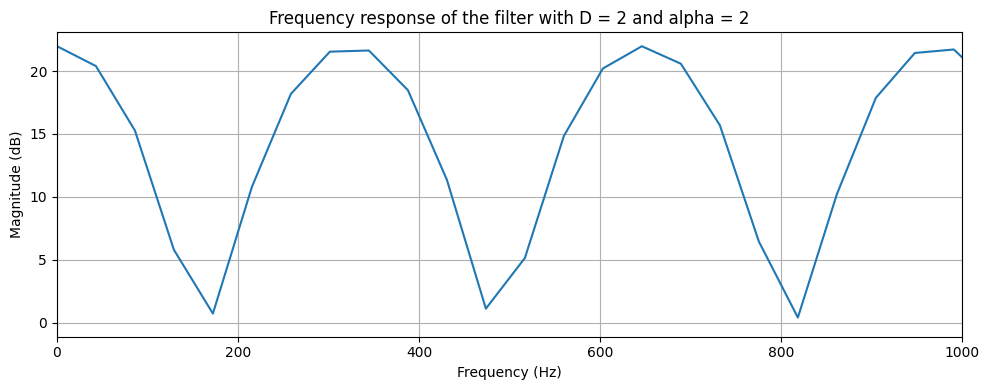

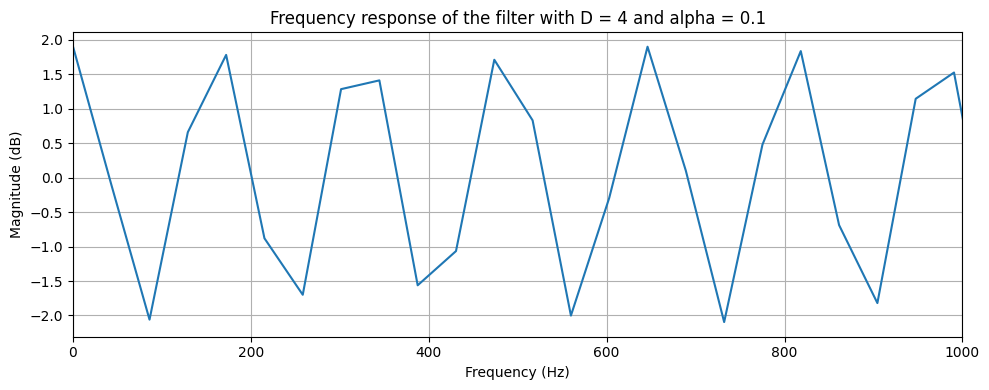

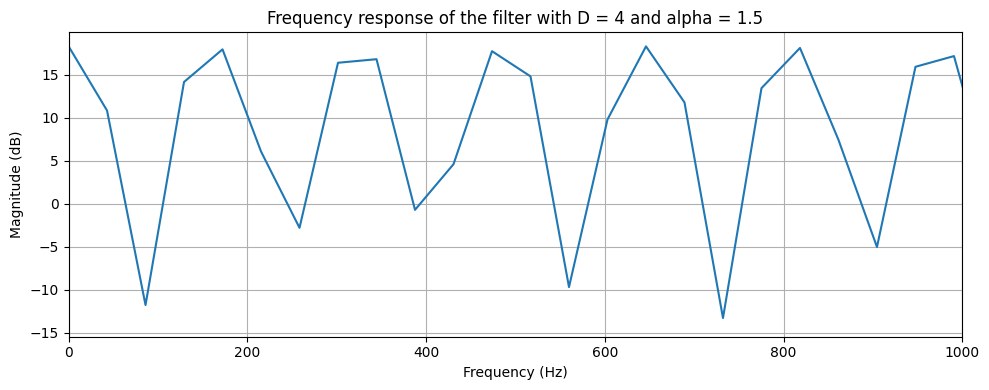

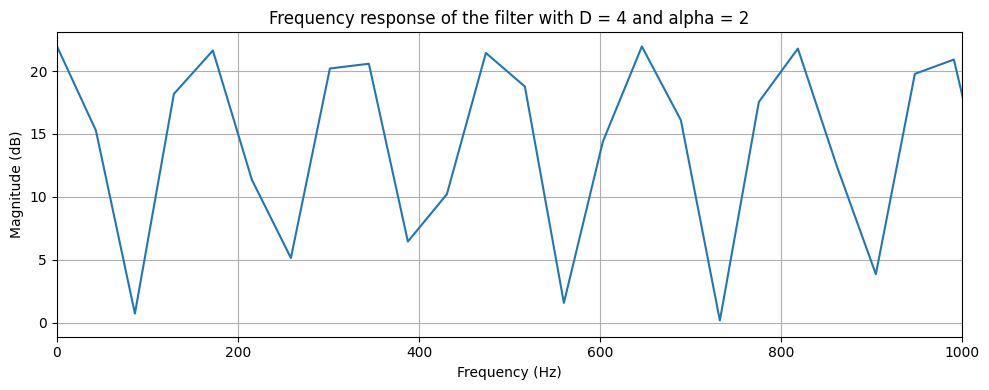

In [26]:
#Calculating the frequency response of the impulse response in the case of the FIR filter

for D in [1,2,4]:
    for alpha in [0.1, 1.5, 2]:
        delay = int(D * fs)
        b = np.zeros(delay+1)
        b[0] = 1
        b[delay] = alpha
        w, h = signal.freqz(b, 1, fs=fs)
        plt.figure(figsize=(10,4))
        plt.plot(w, 20 * np.log(np.abs(h)+np.finfo(float).eps))
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Magnitude (dB)')
        plt.title('Frequency response of the filter with D = '+str(D)+' and alpha = '+str(alpha))
        plt.grid()
        plt.xlim([0, 1000])
        plt.tight_layout()
        plt.show()

## Conclusion:

1.The implementation is stable when ( $|\beta| < 1$ \) as the stability is determined by the poles of the system. If $\beta$ equals or exceeds 1 in magnitude, the filter can become unstable. When delay is exactly 1, the filter acts as expected where it amplifies high frequency signals.

2.  The parameters are:
    \( $\alpha$ \): This represents the scaling factor applied to the input signal. It determines the amplification or attenuation of the direct path from the input to the output of the system.
   - \( $\beta$ \): This parameter signifies the attenuation factor affecting the delayed signal. It governs the strength of feedback in the system. The value of β plays a crucial role in determining the stability of the filter.
   - \( $D$ \): It determines the delay time in samples

3.In comparison: FIR filters have a finite-duration response to input signals and are inherently stable. They employ feedforward implementations, meaning there is no feedback involved. While FIR filters typically require more coefficients (higher orders) to achieve comparable filtering effects, they are well-suited for applications where stability and precise control are paramount. On the other hand, IIR filters exhibit infinite responses and can potentially become unstable based on the absolute value of the feedback coefficient like (|β|). They use feedback in their implementations, which introduces complexity but often allows them to achieve similar filtering outcomes with fewer coefficients, potentially making them computationally efficient.

---

# Exercise 2 - Image filtering

## Data

Images you want (you can use Barbara provided in the Fourier section)

## Goal

For a given image, implement the following filters and discuss their effects

    Gradient filter
    Sobel filter
    Averaging filter
    Gaussian filter

## Import the libraries

In [12]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import fftpack
from scipy import ndimage
import cv2

## Using the barbara image from the "Zoom in images" notebook

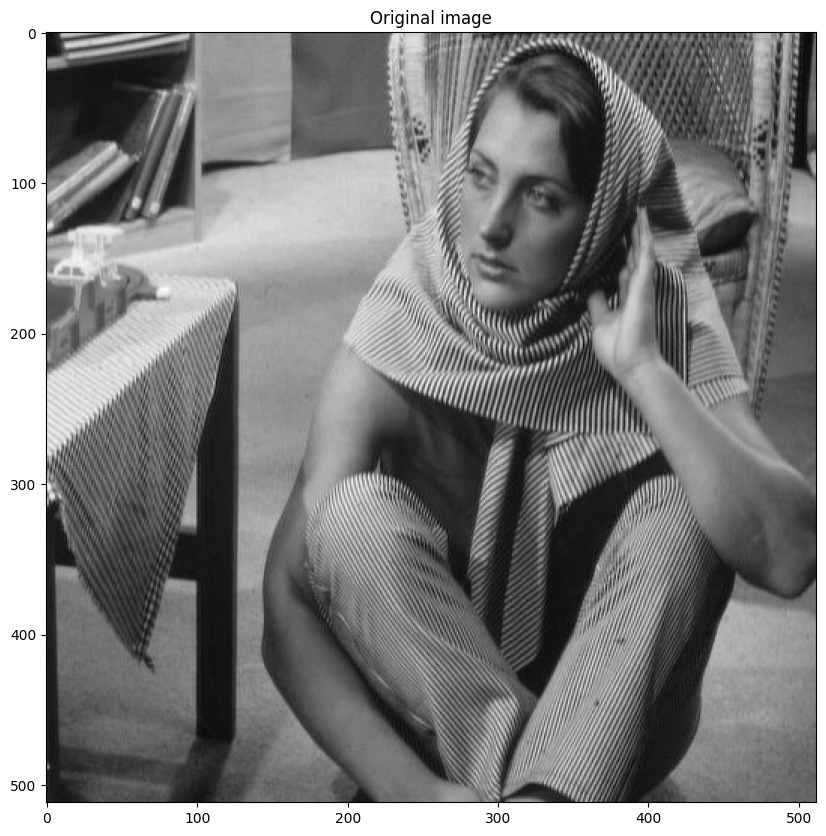

In [13]:
# Load image
img = mpimg.imread('barbara.jpg')
img = img[:,:,0]

# Plot image
plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')
plt.title('Original image')
plt.show()

## Gradient filter (Sobel)

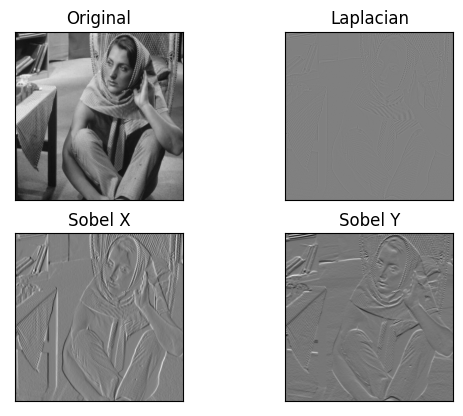

In [14]:
# from : https://docs.opencv.org/4.x/d5/d0f/tutorial_py_gradients.html

# open the image with OpenCV
img = cv2.imread('barbara.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

### Observation : The sobel filter is a gradient filter, it is used to detect edges in an image. It is a 2D convolutional filter. It is used to detect horizontal and vertical edges in an image.

## Magnitude and Direction of the gradient

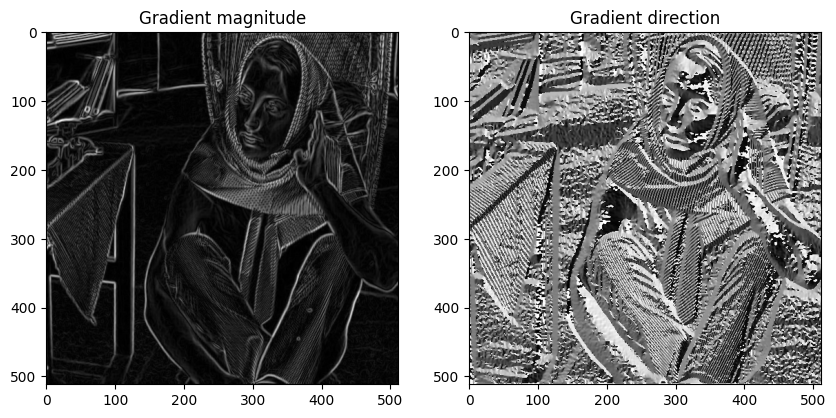

In [15]:
# gradient magnitude
sobel_mag=np.hypot(sobelx,sobely)

# gradient direction
sobel_dir=np.arctan2(sobely,sobelx)

# plot them
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(sobel_mag,cmap=plt.cm.gray)
plt.title('Gradient magnitude')
plt.subplot(1,2,2)
plt.imshow(sobel_dir,cmap=plt.cm.gray)
plt.title('Gradient direction')
plt.show()

### Observation : The magnitude is detecting the edges of the image, and the direction is giving the direction of the edges.  

## Averaging filter

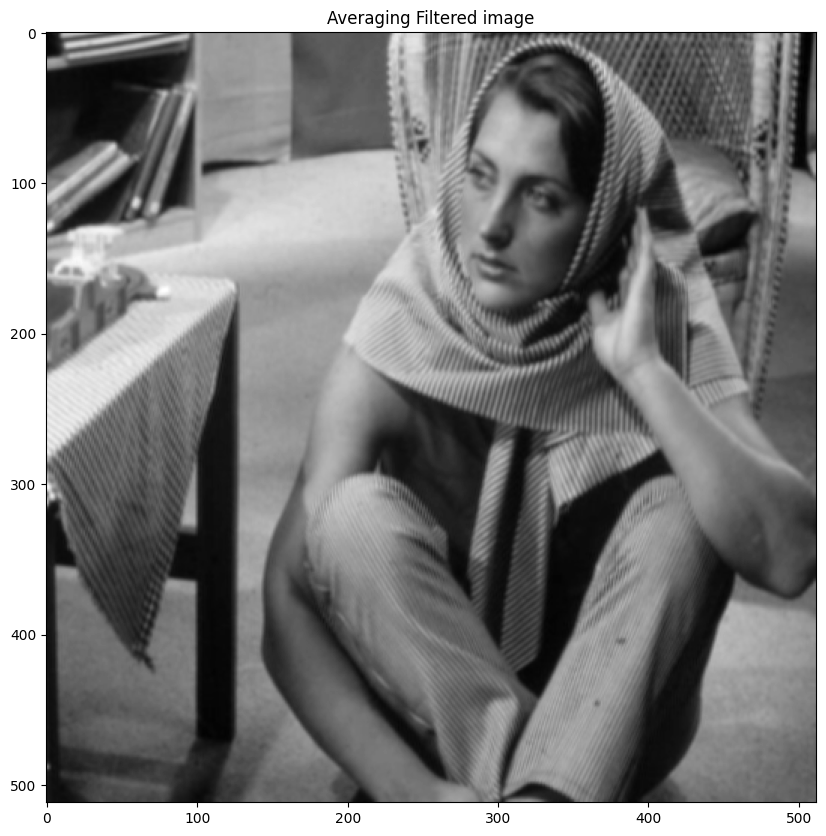

In [16]:
# apply a averaging filter to the image

# define the filter
kernel = np.ones((3,3))/9

# convolve the image with the filter
img_filtered = ndimage.convolve(img, kernel)

# # apply the filter
# img_filtered = ndimage.generic_filter(img, np.mean, size=3)

# Plot image
plt.figure(figsize=(10,10))
plt.imshow(img_filtered, cmap='gray')
plt.title('Averaging Filtered image')
plt.show()

## Gaussian filter

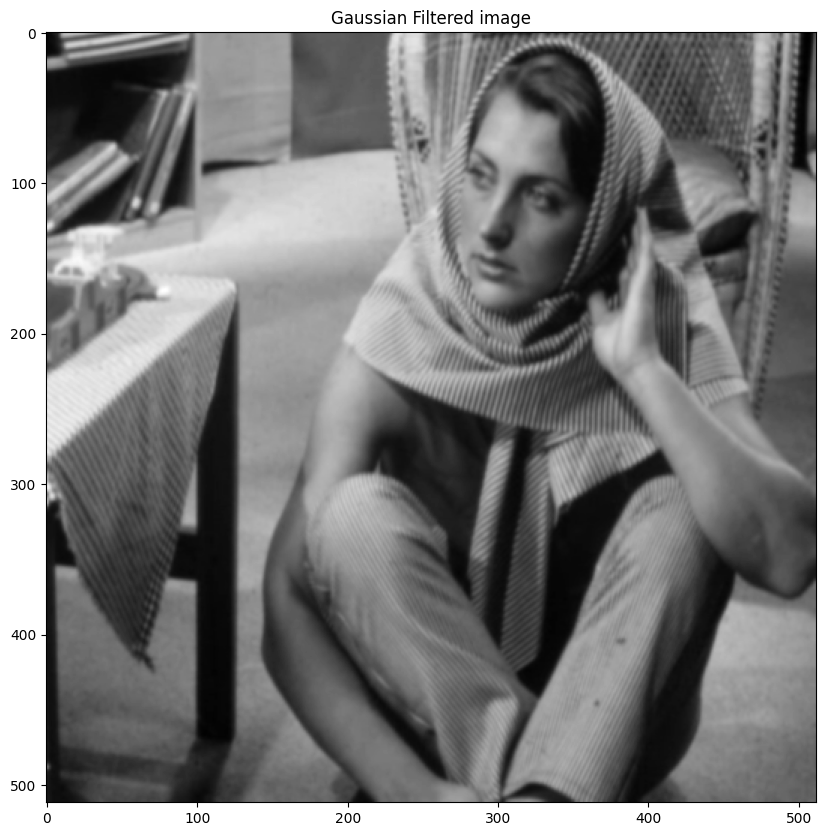

In [17]:
# apply a gaussian filter to the image

# apply the filter
img_filtered = ndimage.gaussian_filter(img, sigma=1)

# Plot image
plt.figure(figsize=(10,10))
plt.imshow(img_filtered, cmap='gray')
plt.title('Gaussian Filtered image')
plt.show()

### Observation : Both the averaging and gaussian filters are used to blur the image. They are low pass filter, it is used to remove the high frequency components from the image.